In [14]:
# Importing Libraries

from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

Train:0.810000,Test:0.834


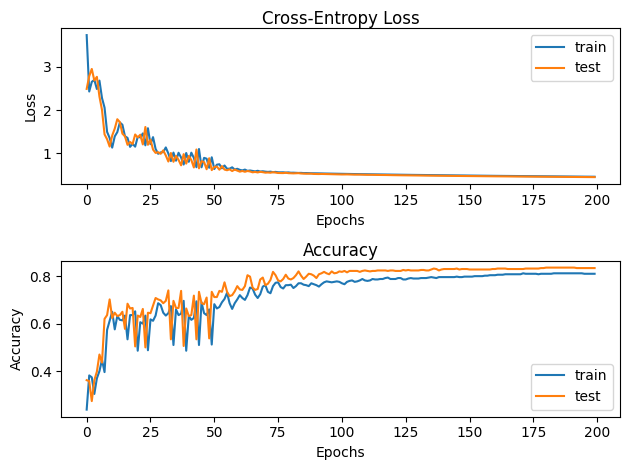

In [15]:
# Generating 2-D Classification Dataset
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2)

# Applying the One-Hot-Encoding on "y" dependent variable
y=to_categorical(y)

# Observations=500
n_train=500

# Split the data into Training & Testing
trainX,testX=X[:n_train,:],X[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

# Defining the Model
model=Sequential()
model.add(Dense(50,input_dim=2,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(3,activation="softmax"))

#Compile the Model
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

# Fitting the model
history=model.fit(trainX,trainy,validation_data=(testX,testy),epochs=200,verbose=0,batch_size=len(trainX))  # Here we are giving the entire length of Train data so it it BGD Model

# Evaluating the Model
_,train_acc=model.evaluate(trainX,trainy,verbose=0)
_,test_acc=model.evaluate(testX,testy,verbose=0)

# Displying the Results
print("Train:%3f,Test:%.3f" %(train_acc,test_acc))

# Plot Loss Learning Curve
pyplot.subplot(211)
pyplot.title("Cross-Entropy Loss", pad=-40)
pyplot.plot(history.history["loss"], label="train")
pyplot.plot(history.history["val_loss"], label="test")
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
pyplot.legend()

# Plot Accuracy Learning Curve
pyplot.subplot(212)
pyplot.title("Accuracy", pad=-40)
pyplot.plot(history.history["accuracy"], label="train")
pyplot.plot(history.history["val_accuracy"], label="test")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.legend()

pyplot.tight_layout()  # Adjust subplots to fit into the figure area
pyplot.show()

- Here we can clearly understand that the model is for Batch Gradient Descent.
- Where we gave the Batch Size is entire length of training data.